In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re

from models.MeTooDataset import MeTooDataset

In [2]:
experiment_name = '9C'

# Training Dataset

In [3]:
train_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='metoo_training',
)

In [4]:
train_df = pd.DataFrame(
    {
        'text': train_dataset.X,
        'stance': train_dataset.y
    }
)

In [5]:
train_group = np.concatenate(train_df.groupby('stance').count().values)

In [6]:
df_stances = pd.DataFrame.from_dict(
    {
        'Training Dataset': {
            'Against': train_group[0],
            'Neutral': train_group[1],
            'Favor': train_group[2]
        }
    }
).transpose()

In [7]:
df_stances = df_stances[['Against', 'Neutral', 'Favor']]

# Plot

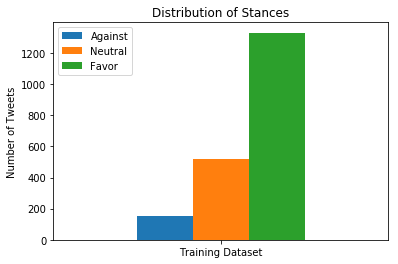

In [8]:
df_stances.plot(kind='bar', title='Distribution of Stances', rot=0)

plt.ylabel('Number of Tweets')
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_training.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [9]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_stances.tex', 'w') as f:
    df_stances.to_latex(f)